In [1]:
from node_random.pytorchwrd2 import GraphEmbedding, SkipGram

In [2]:
import networkx as nx
import random
import numpy as np
from typing import List
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

In [3]:
G = nx.karate_club_graph()

In [4]:
def loss_function(Z, S):
    """
    Calculate the objective function ||Z^T*Z - S||^2.

    Args:
        Z (numpy.ndarray): The node embeddings as a numpy array.
        S (numpy.ndarray): The similarity matrix.

    Returns:
        float: The value of the objective function.
    """
    Z_transpose = np.transpose(Z)
    diff = np.dot(Z_transpose, Z) - S
    #     obj_func = np.linalg.norm(diff) ** 2
    obj_func = np.linalg.norm(diff)
    return obj_func

In [5]:
# Define the hyperparameter search space
param_space = {
    'return_param': np.random.uniform(0.0, 4.0, 50),  # Example: random uniform sampling
    'in_out_param': np.random.uniform(0.0, 4.0, 50),  # Example: random uniform sampling
    'num_walks': np.random.randint(5, 15, 8),  # Example: random integer sampling
    'walk_length': np.random.randint(5, 15,10),  # Example: random integer sampling
    'window_size': np.random.randint(5, 10, 5),  # Example: random integer sampling
    'dimension': np.random.choice([2,4,6,8,10], 6),  # Example: random choice
    'epochs': np.random.choice([100, 150,200,125,300], 5),  # Example: random choice
    'negative': np.random.choice([3, 6], 5),  # Example: random choice
    'batch_words': np.random.choice([8, 16], 5),  # Example: random choice
    'learning_rate': np.random.choice([0.01, 0.0001, 0.02],10),
    'min_count': np.random.choice([0, 1,2], 6),
}

best_loss = float('inf')
best_params = None

In [6]:
# Perform random search
num_iterations = 20  # Adjust the number of iterations as needed


Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [01:53<00:00,  1.32it/s]


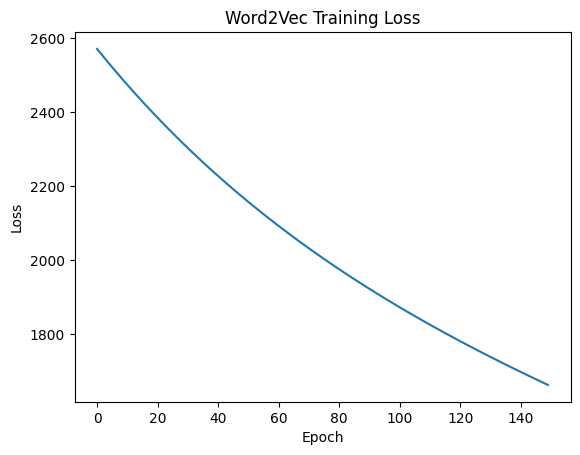

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [01:23<00:00,  1.50it/s]


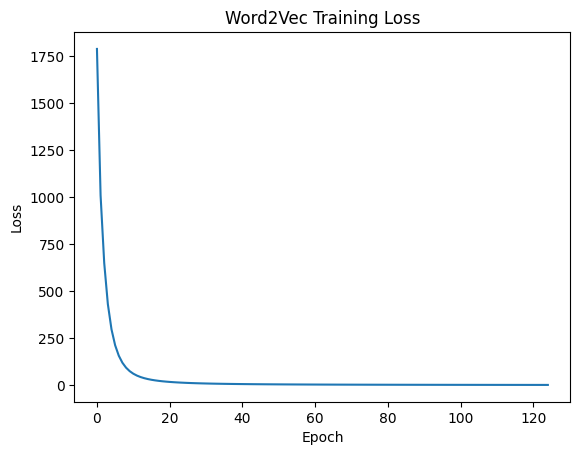

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [03:26<00:00,  1.38s/it]


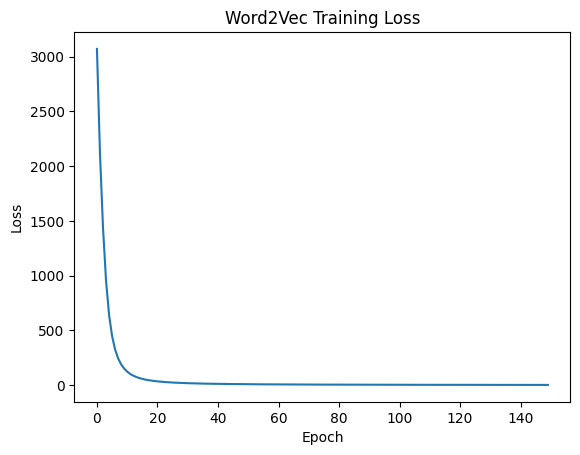

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [02:52<00:00,  1.15s/it]


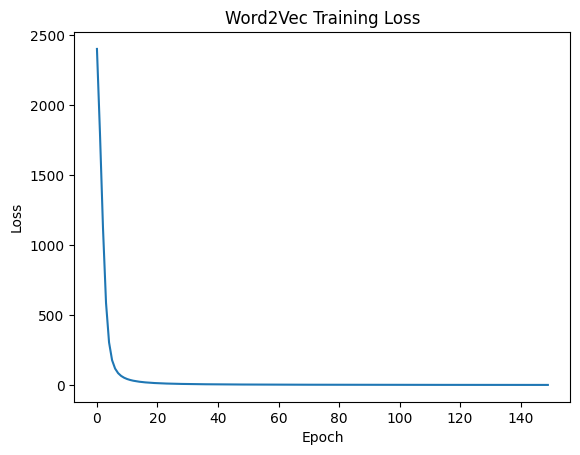

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:33<00:00,  1.30it/s]


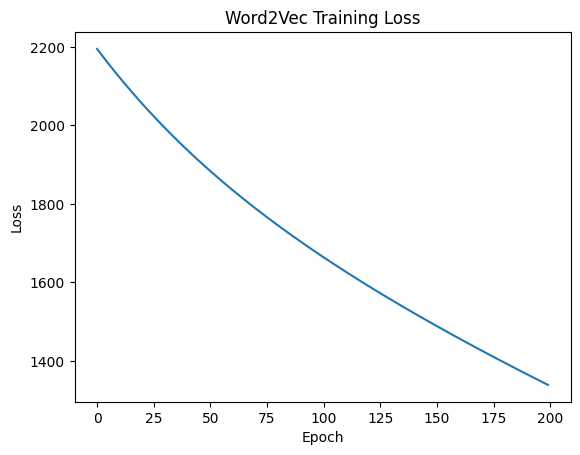

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:25<00:00,  1.38it/s]


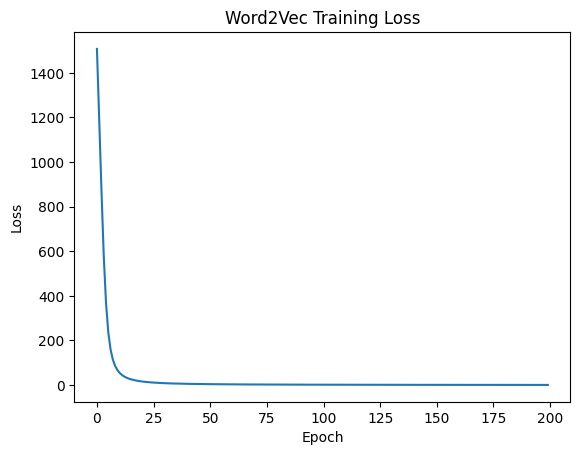

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [03:00<00:00,  1.45s/it]


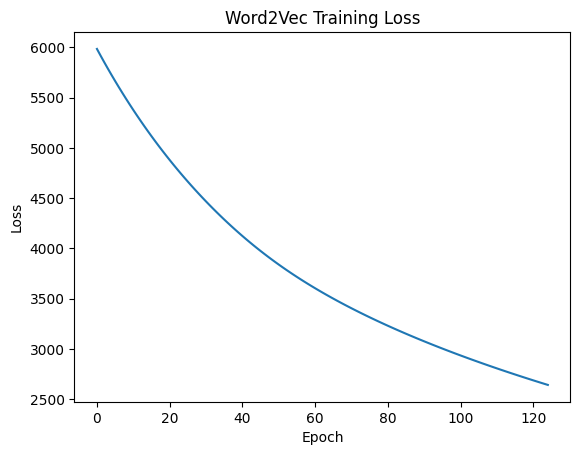

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [02:45<00:00,  1.10s/it]


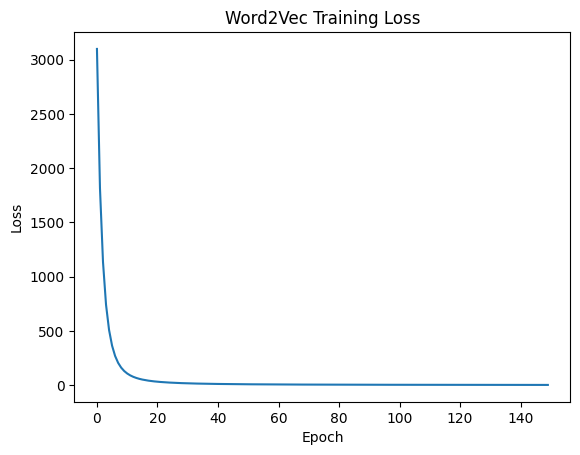

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [02:06<00:00,  1.01s/it]


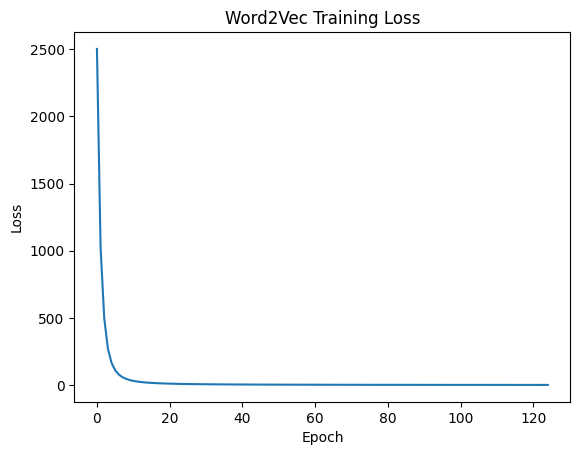

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [01:02<00:00,  2.39it/s]


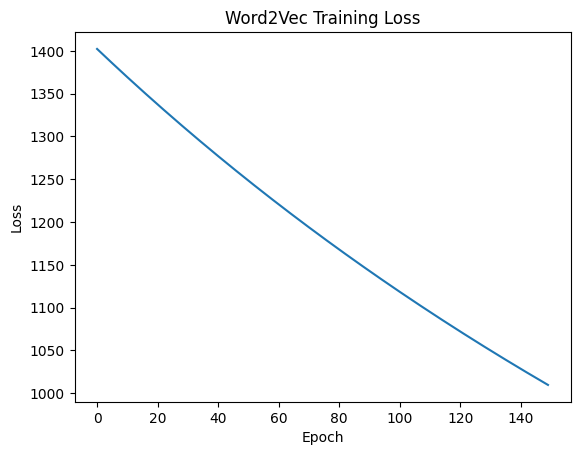

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [03:26<00:00,  1.65s/it]


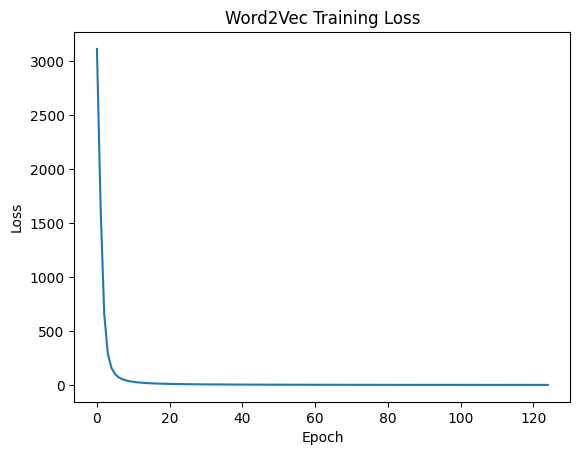

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [02:40<00:00,  1.07s/it]


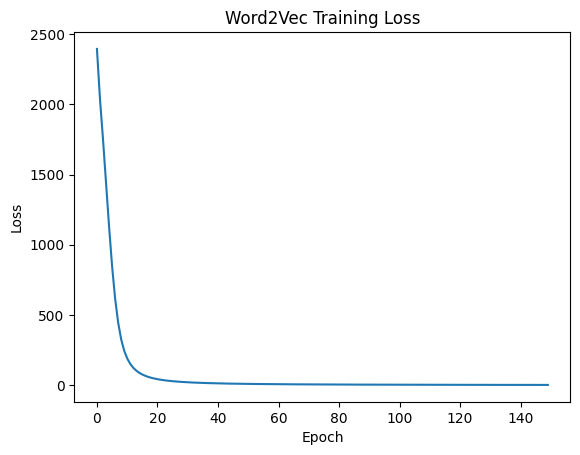

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [01:52<00:00,  1.34it/s]


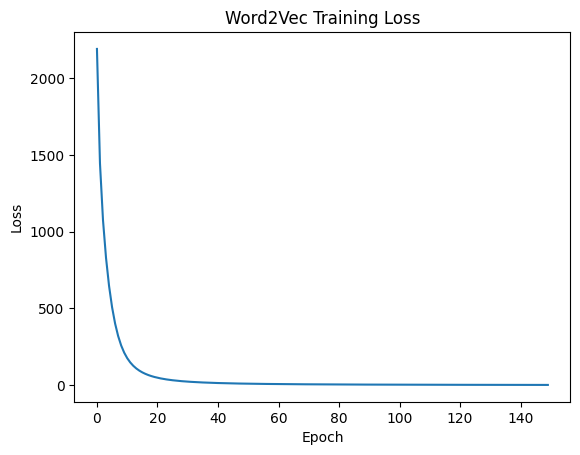

Training Word2Vec: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [02:56<00:00,  1.42s/it]


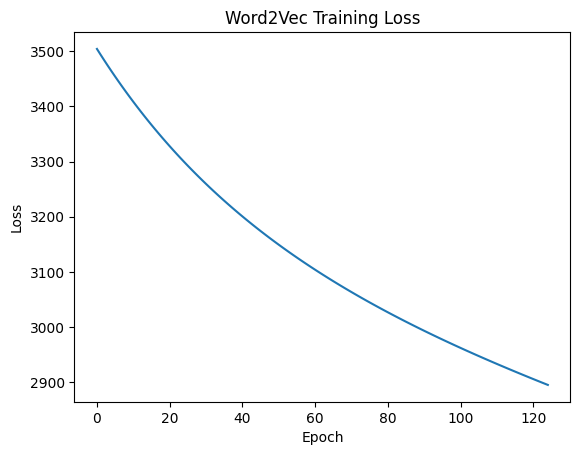

Training Word2Vec:  57%|████████████████████████████████████████████████████████▏                                         | 86/150 [03:01<02:15,  2.11s/it]


KeyboardInterrupt: 

In [7]:
for _ in range(num_iterations):
    # Randomly sample hyperparameters
    sampled_params = {param: np.random.choice(values) for param, values in param_space.items()}
    
    # Create an instance of your GraphEmbedding class with sampled hyperparameters
    embedding = GraphEmbedding(
        graph=G,
        return_param=sampled_params['return_param'],
        in_out_param=sampled_params['in_out_param'],
        num_walks=sampled_params['num_walks'],
        walk_length=sampled_params['walk_length'],
    )
    
    probab = embedding.calculate_transition_probabilities()
    # Train and evaluate with the current set of hyperparameters
    walks, uns = embedding.generate_random_walks()
    S = embedding.calculate_probability_matrix(uns)
    node_embeddings = embedding.training(
        walks,
        window_size=sampled_params['window_size'],
        dimension=sampled_params['dimension'],
#         sg=1,
        epochs=sampled_params['epochs'],
#         negative=sampled_params['negative'],
#         batch_words=sampled_params['batch_words'],
        learning_rate = sampled_params['learning_rate']
    )
    embeddings = node_embeddings.in_embed.weight.data
    Z = embeddings.T
    current_loss = loss_function(Z, S)
    
    # Update the best hyperparameters if the current set is better
    if current_loss < best_loss:
        best_loss = current_loss
        best_params = sampled_params